In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data
t = np.array([200.0, 200.0, 200.0, 240.0, 400.0, 150.0, 483.4, 233.4, 333.4, 233.4, 716.8, 250.0, 
              316.7, 316.7, 333.4, 733.5, 866.84, 400.1, 266.7, 383.4, 500.1, 250.0, 216.7, 133.36, 
              400.1, 400.1, 566.8, 766.8, 416.8, 416.8, 183.37, 616.8, 400.1, 466.8, 333.4, 383.4, 
              416.75, 483.43, 300.1, 200.0, 416.8, 333.4, 433.4, 133.4, 333.4])

z = np.array([7, 7, 8, 7, 25, 23, 30, 18, 24, 20, 37, 22, 13, 27, 25, 35, 30, 31, 17, 20, 25, 
              13, 15, 12, 22, 30, 17, 30, 23, 23, 15, 20, 20, 27, 23, 24, 26, 27, 25, 15, 22, 
              30, 25, 10, 28])

# New data
t_new = np.array([350.1, 350.1, 766.8, 616.8, 200.0, 516.8, 316.7, 700.2, 183.4, 266.7])
z_new = np.array([33, 13, 17, 22, 27, 16, 15, 22, 30, 20])

# Append new data to existing arrays
t = np.append(t, t_new)
z = np.append(z, z_new)

# Confirm new length
print(len(t), len(z))  # Should reflect the updated number of data points


print(len(t), len(z))  # Confirming both arrays have the same length

55 55
55 55


In [7]:
import math

# uncertainties
sigma_t = 1000 / 60  # 16.67 ms
sigma_z = 2.5  # mm


velocities = z / t  
mean_velocity = np.mean(velocities)

# error propagation for velocity
sigma_velocity = np.sqrt(np.sum((velocities**2) * ((sigma_z / z)**2 + (sigma_t / t)**2))) / len(t)

mean_velocity_cm_s = mean_velocity * 100
sigma_velocity_cm_s = sigma_velocity * 100

# Print velocity
print(f"Velocity: ({mean_velocity_cm_s:.2f} ± {sigma_velocity_cm_s:.2f}) cm/s")

# constants for delta calculation
mu = 1.8e-3  # Pa·s 
rho = 1000   # kg/m³ 
g = 9.81     # m/s²

# Function to calculate delta
def calculate_delta(u):
    return math.sqrt((3 * mu * u) / (rho * g))

delta_result = calculate_delta(mean_velocity)

# error propagation for delta
sigma_delta = (0.5 * delta_result * (sigma_velocity / mean_velocity))

delta_microns = delta_result * 1e6
sigma_delta_microns = sigma_delta * 1e6

print(f"Delta: ({delta_result:.6e} ± {sigma_delta:.6e}) m")

print(f"Delta: ({delta_microns:.2f} ± {sigma_delta_microns:.2f}) µm")


Velocity: (6.37 ± 0.14) cm/s
Delta: (1.871938e-04 ± 2.024485e-06) m
Delta: (187.19 ± 2.02) µm


In [8]:

# Compute individual uncertainties in velocity
sigma_v_individual = velocities * np.sqrt((sigma_z / z)**2 + (sigma_t / t)**2)

# Compute delta for each measurement
delta_individual = np.sqrt((3 * mu * velocities) / (rho * g))

# Compute uncertainty in delta for each measurement
sigma_delta_individual = (0.5 * delta_individual) * (sigma_v_individual / velocities)


for i in range(3):
    print(f"Measurement {i+1}: Δ = {delta_individual[i]:.6e} ± {sigma_delta_individual[i]:.6e} m")

# Compute the mean uncertainty of individual delta measurements
mean_sigma_delta = np.mean(sigma_delta_individual)

print(f"Mean Uncertainty on a Single Measurement of Delta: {mean_sigma_delta:.6e} m")
print(f"Mean Uncertainty on a Single Measurement of Delta: {mean_sigma_delta * 1e6:.2f} µm")



Measurement 1: Δ = 1.388022e-04 ± 2.545190e-05 m
Measurement 2: Δ = 1.388022e-04 ± 2.545190e-05 m
Measurement 3: Δ = 1.483858e-04 ± 2.399549e-05 m
Mean Uncertainty on a Single Measurement of Delta: 1.323237e-05 m
Mean Uncertainty on a Single Measurement of Delta: 13.23 µm


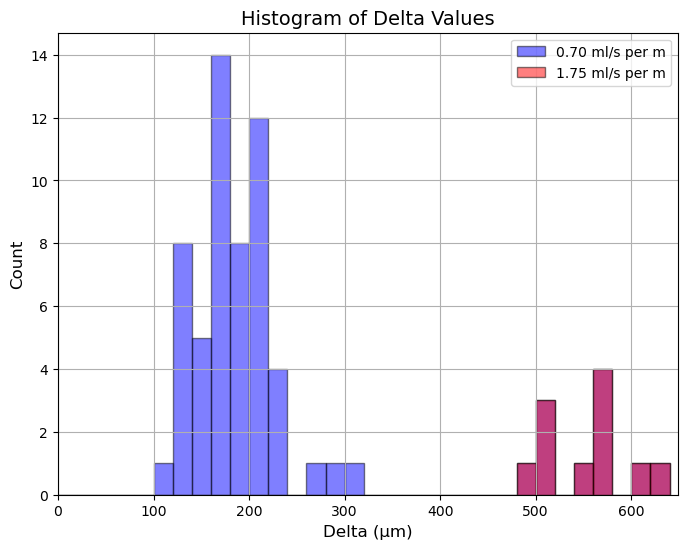

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# New data to be added as red boxes
t_red = np.array([16.7, 16.7, 16.7, 16.7, 16.7, 16.7, 16.7, 16.7, 16.7, 16.7, 16.7])  
z_red = np.array([10, 8, 11, 8, 10, 12, 8, 7, 10, 10, 9])

# Append all data to the main dataset
t = np.append(t, t_red)
z = np.append(z, z_red)

# Compute velocities and delta values for all data
velocities = z / t
delta_values = np.array([calculate_delta(v) for v in velocities]) * 1e6  # Convert to microns

# Compute velocities and delta values for red-box data separately
velocities_red = z_red / t_red
delta_values_red = np.array([calculate_delta(v) for v in velocities_red]) * 1e6  # Convert to microns

# Define different bin widths
bin_width_main = 20  # µm
bin_width_red = 20   # µm

# Define different bin arrays
bins_main = np.arange(0, max(delta_values) + bin_width_main, bin_width_main)
bins_red = np.arange(0, max(delta_values_red) + bin_width_red, bin_width_red)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(delta_values, bins=bins_main, density=False, alpha=0.5, color='blue', edgecolor='black', label='0.70 ml/s per m')
plt.hist(delta_values_red, bins=bins_red, density=False, alpha=0.5, color='red', edgecolor='black', label='1.75 ml/s per m')

# Set x-axis to start at 0
plt.xlim(0, max(delta_values) + bin_width_main)  

# Labels in microns
plt.xlabel('Delta (µm)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.title('Histogram of Delta Values', fontsize=14)
plt.legend()
plt.show()
